In [17]:
import torch
import torchvision
import datasets, networks, sampling, evaluation
import matplotlib.pyplot as plt
from torch import nn, optim

In [18]:
# HYPERPARAMETERS
num_epochs = 5 


# TODO Select a batch size.
batch_size = 32


# TODO Select a learning rate.
lr= 0.0001


num_units=500
num_layer=5

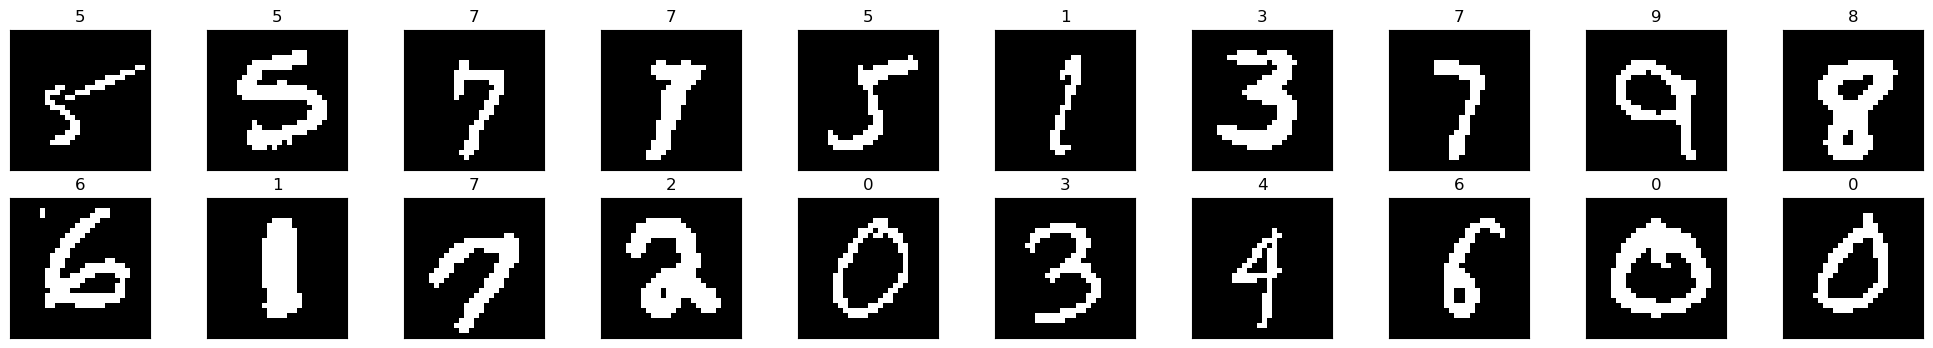

In [19]:
# Create Dataset/Data Loaders and visualize Dataset
Ds = datasets.Dataset('mnist', batch_size=batch_size)
training_data = Ds.get_train_data_loader()
test_data = Ds.get_test_data_loader()

Ds.visualize_dataset(training_data)


ordering=range(1,785) 

In [20]:
import time
# Training
MADE = networks.MADE(num_layer=num_layer, num_units=num_units, ordering=ordering, input_feat=28*28)

# Select device
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')
print(f'Using device: {device}')
print('=========================================')

MADE.to(device)

loss_curve = []
accuracy_curve = []
epoch_markers = []
optimizer= torch.optim.Adam(MADE.parameters(),lr)

overall_start_time = time.time()

for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  MADE.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device)

    # TODO Write your code here.

    output = MADE(images)
    loss = nn.functional.binary_cross_entropy(output,images)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      loss_curve.append(average_loss)
      losses = []
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  print(f'Epoch: {epoch + 1:3d}, Test Loss: {evaluation.evaluate(model = MADE,test_data_loader = test_data, device = device):.4f}')
  print('-----------------------------------------')
  
  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')

Using device: cuda:0
Epoch:   1/  5, Batch     1, Loss: 0.7137
Epoch:   1/  5, Batch   101, Loss: 0.4607
Epoch:   1/  5, Batch   201, Loss: 0.2647
Epoch:   1/  5, Batch   301, Loss: 0.2109
Epoch:   1/  5, Batch   401, Loss: 0.1836
Epoch:   1/  5, Batch   501, Loss: 0.1683
Epoch:   1/  5, Batch   601, Loss: 0.1570
Epoch:   1/  5, Batch   701, Loss: 0.1481
Epoch:   1/  5, Batch   801, Loss: 0.1397
Epoch:   1/  5, Batch   901, Loss: 0.1329
Epoch:   1/  5, Batch  1001, Loss: 0.1257
Epoch:   1/  5, Batch  1101, Loss: 0.1226
Epoch:   1/  5, Batch  1201, Loss: 0.1176
Epoch:   1/  5, Batch  1301, Loss: 0.1136
Epoch:   1/  5, Batch  1401, Loss: 0.1099
Epoch:   1/  5, Batch  1501, Loss: 0.1056
Epoch:   1/  5, Batch  1601, Loss: 0.1033
Epoch:   1/  5, Batch  1701, Loss: 0.1006
Epoch:   1/  5, Batch  1801, Loss: 0.0971
-----------------------------------------
Epoch:   1 took 12.64s
Epoch:   1, Test Loss: 0.0864
-----------------------------------------
Epoch:   2/  5, Batch     1, Loss: 0.0979
Ep

KeyboardInterrupt: 